In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df=pd.read_csv('movies.csv', sep=",")

In [5]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
df_filtered = df[(df['Netflix'] == 1) | (df['Disney+'] == 1)]

In [6]:
df_filtered = df_filtered[['Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Disney+']]

In [7]:
df_filtered.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Disney+
0,The Irishman,2019,18+,98/100,1,0
1,Dangal,2016,7+,97/100,1,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0
4,Roma,2018,18+,94/100,1,0


In [8]:
df_disney = df_filtered[df_filtered['Disney+'] == 1]
df_netflix = df_filtered[df_filtered['Netflix'] == 1]


In [56]:
age_distribution_disney = df_disney['Age'].value_counts()
age_distribution_netflix = df_netflix['Age'].value_counts()
age_stats = df_filtered.groupby(['Disney+', 'Netflix'])['Age'].describe()
print("=== Age Distribution on Disney+ ===")
for age_group, count in age_distribution_disney.items():
    print(f"{age_group}: {count} movies")

print("\n=== Age Distribution on Netflix ===")
for age_group, count in age_distribution_netflix.items():
    print(f"{age_group}: {count} movies")
    
print("\n=== Age Restrictions Statistics by Platform Combination ===")
print(age_stats)


=== Age Distribution on Disney+ ===
all: 370 movies
7+: 278 movies
13+: 70 movies
16+: 4 movies
18+: 3 movies

=== Age Distribution on Netflix ===
18+: 877 movies
13+: 404 movies
7+: 322 movies
16+: 151 movies
all: 144 movies

=== Age Restrictions Statistics by Platform Combination ===
                count unique  top freq
Disney+ Netflix                       
0       1        1895      5  18+  877
1       0         722      5  all  369
        1           3      2   7+    2


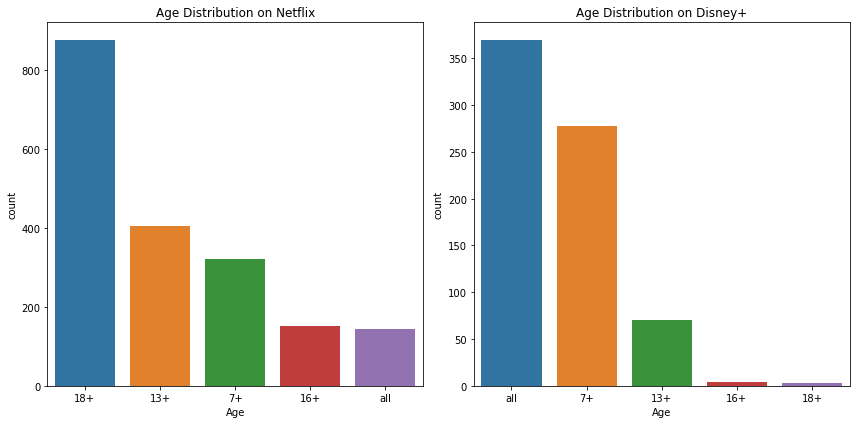

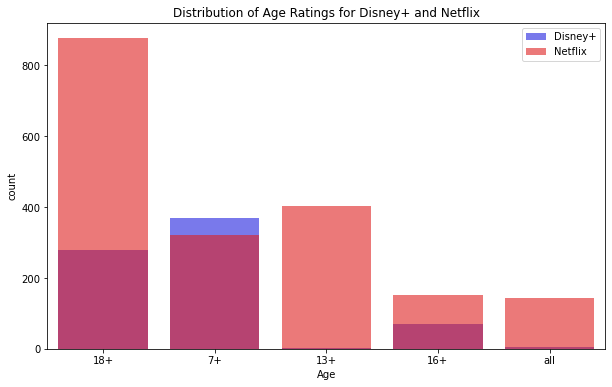

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Age', data=df_netflix, order=df_netflix['Age'].value_counts().index)
plt.title('Age Distribution on Netflix')
plt.subplot(1, 2, 2)
sns.countplot(x='Age', data=df_disney, order=df_disney['Age'].value_counts().index)
plt.title('Age Distribution on Disney+')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered[df_filtered['Disney+'] == 1], x='Age', label="Disney+", color='blue', alpha=0.6)
sns.countplot(data=df_filtered[df_filtered['Netflix'] == 1], x='Age', label="Netflix", color='red', alpha=0.6)
plt.title("Distribution of Age Ratings for Disney+ and Netflix")
plt.legend()
plt.show()

In [57]:
rt_stats = df_filtered.groupby(['Disney+', 'Netflix'])['Rotten Tomatoes'].describe()
print("Rotten Tomatoes Scores on Disney+:")
print(df_disney['Rotten Tomatoes'].describe())
print("\nRotten Tomatoes Scores on Netflix:")
print(df_netflix['Rotten Tomatoes'].describe())
print("=== Rotten Tomatoes Scores by Platform Combination ===")
print(rt_stats)


Rotten Tomatoes Scores on Disney+:
count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes, dtype: float64

Rotten Tomatoes Scores on Netflix:
count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64
=== Rotten Tomatoes Scores by Platform Combination ===
                  count       mean        std   min    25%   50%   75%   max
Disney+ Netflix                                                             
0       1        3682.0  54.439707  13.852280  10.0  45.00  53.0  63.0  98.0
1       0         916.0  58.304585  13.978282  10.0  48.00  57.5  68.0  96.0
        1           6.0  59.500000  10.212737  50.0  51.75  56.5  65.0  76.0


C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


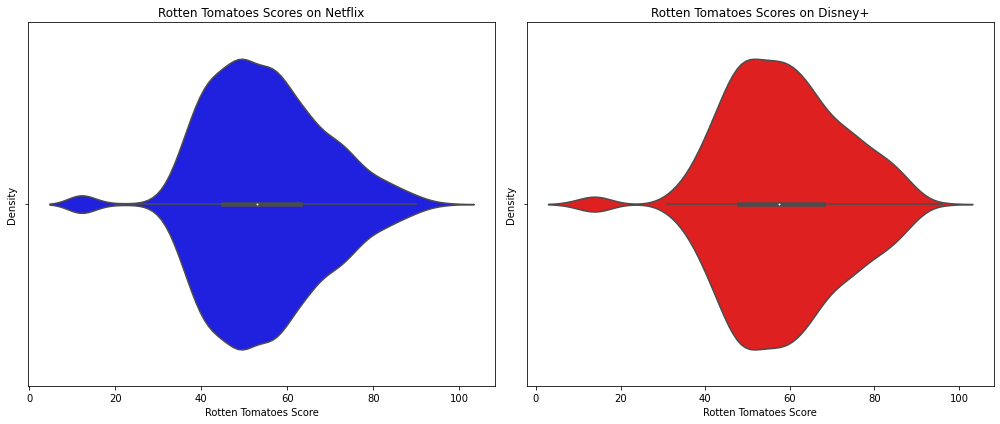

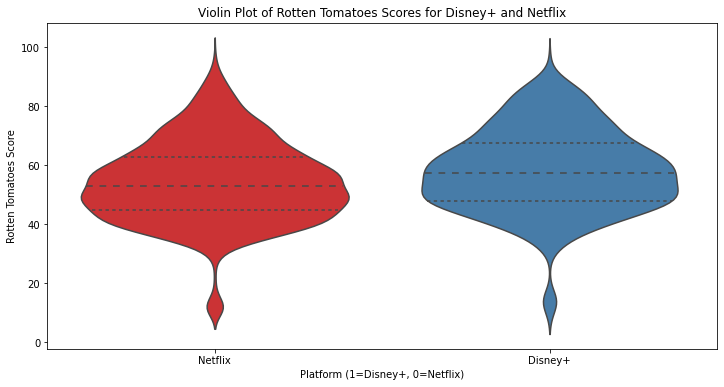

In [45]:

df_filtered['Rotten Tomatoes'] = df_filtered['Rotten Tomatoes'].astype(str).str.replace('/100', '')
df_filtered['Rotten Tomatoes'] = pd.to_numeric(df_filtered['Rotten Tomatoes'], errors='coerce')

# Create subplots for Rotten Tomatoes scores on both Netflix and Disney+
plt.figure(figsize=(14, 6))  
plt.subplot(1, 2, 1)
sns.violinplot(df_netflix['Rotten Tomatoes'], color='blue')
plt.title('Rotten Tomatoes Scores on Netflix')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Density')  

plt.subplot(1, 2, 2)
sns.violinplot(df_disney['Rotten Tomatoes'], color='red')
plt.title('Rotten Tomatoes Scores on Disney+')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


df_filtered['Disney+'] = df_filtered['Disney+'].astype('category')
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_filtered[(df_filtered['Disney+'] == 1) | (df_filtered['Netflix'] == 1)],
    x='Disney+',
    y='Rotten Tomatoes',
    palette="Set1", 
    inner='quartile'
)
plt.title("Violin Plot of Rotten Tomatoes Scores for Disney+ and Netflix")
plt.xlabel("Platform (1=Disney+, 0=Netflix)")
plt.ylabel("Rotten Tomatoes Score")
plt.xticks([0, 1], ['Netflix', 'Disney+'])  

plt.show()


In [28]:
age_contingency_table = pd.crosstab(df_filtered['Age'], [df_filtered['Netflix'], df_filtered['Disney+']])

In [30]:
chi2_stat, p_value, dof, expected = chi2_contingency(age_contingency_table)

print("Chi-Square Test Results for Age Restrictions:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Test Results for Age Restrictions:
Chi2 Statistic: 1030.601144927122
P-value: 3.701402558260122e-217


In [32]:
disney_scores = df_disney['Rotten Tomatoes'].dropna()
netflix_scores = df_netflix['Rotten Tomatoes'].dropna()
t_stat, p_value_rt = ttest_ind(disney_scores, netflix_scores)
print("\nT-Test for Rotten Tomatoes Scores:")
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value_rt}")


T-Test for Rotten Tomatoes Scores:
T-Statistic: 7.567567531710881
P-value: 4.5645960458960904e-14
